<a href="https://colab.research.google.com/github/malikbf5/Knapsack-problem-using-Branch-Bound/blob/main/Knapsack_problem_using_Branch%26Bound.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Give the number of objects 4
Give the maximum weight 16
Give the value of object 1 40
Give the weight of object 1 2
Give the value of object 2 30
Give the weight of object 2 5
Give the value of object 3 50
Give the weight of object 3 10
Give the value of object 4 10
Give the weight of object 4 5

max profit =  90.0
Best objects to put in the knapsack are:  [1, 3]
Nodes generated by Branch&Bound =  11
Nodes generated by  brute-force enumeration =  16
Nodes saved by Branch&Bound =  5


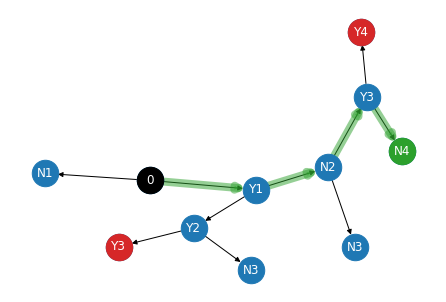

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import pydot
from networkx.drawing.nx_pydot import graphviz_layout

# Getting number of objects
n = 0
while n <= 0:
    while True:
        try:
            n = int(input("Give the number of objects "))
            break
        except:
            print("it needs to be a positive integer")
            
# Getting max weight
while True:
        try:
            W = float(input("Give the maximum weight "))
            break
        except:
            print("it needs to be a real number")
            
p = []
w = []
p_per_weight = []

# Getting the weight and value of each object, and creating a list of value/weight of each object
for i in range(n):
    while True:
        try:
            val = float(input("Give the value of object "+ str(i+1) + " "))
            break
        except:
            print("ce n'est pas un réel")
    while True:
        try:
            poids = float(input("Give the weight of object "+ str(i+1) + " "))
            break
        except:
            print("ce n'est pas un réel")
    p.append(val)
    w.append(poids)

# classifying objects in descending order of value(i)/weight(i) (Best first)
d,e = [],[]
def score(i) : return p[i]/w[i]
items = sorted(range(n) , key=score , reverse = True)

for i in range(len(items)):
    j = items[i]
    d.append(p[j])
    e.append(w[j])
p = d
w = e
p_per_weight = [i/j for i,j in zip(p,w)]

# creating a list to extract classified objects  with their initial index using their ranking 
realitems= []
for i in range(len(items)):
    realitems.append([i,items[i]])

# Knapsack function 
def Knapsack(n,W,p,w,p_per_weight):
    
    # Creating a priority queue
    class Priority_Queue:
        def __init__(self):
            self.pqueue = []
            self.length = 0

        # insert node in the list in ascending order
        def insert(self, node):
            for i in self.pqueue:
                get_bound(i)
            i = 0
            while i < len(self.pqueue):
                if self.pqueue[i].bound > node.bound:
                    break
                i+=1
            self.pqueue.insert(i,node)
            self.length += 1

        # show list
        def print_pqueue(self):
            for i in list(range(len(self.pqueue))):
                print ("pqueue",i, "=", self.pqueue[i].bound)

        # delete node from list
        def remove(self):
            try:
                result = self.pqueue.pop()
                self.length -= 1
            except: 
                print("La liste des sommets est vide")
            else:
                return result

    # Creating node class with: level, profit, weight.
    class Node:
        def __init__(self, level, profit, weight):
            self.level = level
            self.profit = profit
            self.weight = weight
            self.items = []
        def parent(self,parent):
            self.parent = parent
            

    # Calculating the upper bound of a node         
    def get_bound(node):
        if node.weight >= W:
            return 0
        else:
            result = node.profit
            j = node.level + 1
            totweight = node.weight
            while j <= n-1 and totweight + w[j] <= W:
                totweight = totweight + w[j]
                result = result + p[j]
                j+=1
            k = j
            if k<=n-1:
                result = result + (W - totweight) * p_per_weight[k]
            return result

    # Priority queue with 0 nodes
    nodes_generated = 0
    pq = Priority_Queue()
    
    nodes = []

    # creating artificial node at level-1, profit = 0, weight = 0
    v = Node(-1, 0, 0) 
    nodes_generated+=1
    nodes.append(v)

    maxprofit = 0 
    v.bound = get_bound(v)

    pq.insert(v)
    v.label = "0"
    
    #  Branch&Bound procedure while priority queue isn't empty
    while pq.length != 0:
        
        # take node with best upper bound
        v = pq.remove() 
        
        # check if node shows promise
        if v.bound > maxprofit: 
            # branch from node "v" with a new node which contains the next object in the knapsack
            u = Node(0, 0, 0)
            nodes_generated+=1
            nodes.append(u)
            u.level = v.level + 1
            u.profit = v.profit + p[u.level]
            u.weight = v.weight + w[u.level]
            u.items = v.items.copy()
            
            # Associate node to its predecessor and added label "Y" as in "Yes" to taking the next object
            u.parent(v)
            u.label = "Y" +str(realitems[u.level][1]+1)
            
            # add object with the same index as the node's level
            u.items.append(u.level)
            
            # update items in the knapsack and maxprofit
            if u.weight <= W and u.profit > maxprofit: 
                maxprofit = u.profit
                bestitems = u.items
            
            # update upper bound
            u.bound = get_bound(u)
            
            # check if node shows promise to branch from
            if u.bound > maxprofit:
                # add node in priority queue in ascending order
                pq.insert(u)

            # branch from node "v" with a new node which doesn't contain the next object in the knapsack
            u2 = Node(u.level, v.profit, v.weight)
            nodes_generated+=1
            nodes.append(u2)
            u2.bound = get_bound(u2)
            u2.items = v.items.copy()
            
            # Associate node to its predecessor and added label "N" as in "No" to taking the next object
            u2.parent(v)
            u2.label = "N" + str(realitems[u2.level][1]+1)
            
            # check if node shows promise to branch from
            if u2.bound > maxprofit:
                # add node in priority queue in ascending order
                pq.insert(u2)
                
    # recover initial index of objects 
    for i in range(len(bestitems)):
        bestitems[i] = realitems[bestitems[i]][1]
        
    # Affichage du résultat
    print("\nmax profit = ", maxprofit)
    print("Best objects to put in the knapsack are: ", [x+1 for x in bestitems])
    print("Nodes generated by Branch&Bound = ", nodes_generated)
    print("Nodes generated by  brute-force enumeration = ", 2**n)
    print("Nodes saved by Branch&Bound = ",2**n - nodes_generated)
    
    # Creating Branch & Bound graph
    G = nx.DiGraph()
    labels = {}
    G.add_node(nodes[0])
    labels.update({nodes[0]: nodes[0].label})
    i = 1
    l=[]
    # recover the rest of the nodes and their labels and conncetions between them in l
    while i < len(nodes):
        G.add_node(nodes[i])
        labels.update({nodes[i]: nodes[i].label})
        l.append((nodes[i].parent,nodes[i]))
        i = i + 1
    impo = []
    # recover the nodes where the weight> max weight of the knapsack and the the best solution node
    for i in range(len(nodes)):
        if nodes[i].level == items[-1] and nodes[i].profit == maxprofit:
            endnode = nodes[i]
        if nodes[i].bound == 0 and nodes[i] != nodes[0] and nodes[i].profit != maxprofit:
            impo.append(nodes[i])
    nod = endnode
    epath = []
    # recover the path to the best solution node starting from the bottom up
    while nod != nodes[0]:
        epath.append((nod.parent,nod))
        nod = nod.parent
    G.add_edges_from(l)
    pos = nx.spring_layout(G, seed=3113794652)
    nx.draw(G,pos=pos,node_size = 700)
    # best solution node in green
    nx.draw_networkx_nodes(G, pos, nodelist=[endnode], node_color="tab:green",node_size = 700)
    # nodes where the weight> max weight of the knapsack in red
    nx.draw_networkx_nodes(G, pos, nodelist=impo, node_color="tab:red",node_size = 700)
    # first node in black
    nx.draw_networkx_nodes(G, pos, nodelist=[nodes[0]], node_color="black",node_size = 700)
    # best solution path in green
    nx.draw_networkx_edges(G, pos = pos ,edgelist=epath,width=8, alpha=0.5, edge_color="tab:green")
    nx.draw_networkx_labels(G,pos,labels, font_size=12,font_color="white")
    plt.show()
    
# Call the problem function
Knapsack(n,W,p,w,p_per_weight)